In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/non-voters/nonvoters_data.csv')
display(data)

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,1.1916,1,1,3,1,3,1,2,2,...,2,NaN,1.0,NaN,27,Some college,Hispanic,Male,$40-75k,always
5832,477663,1.4623,1,1,1,1,2,1,2,1,...,2,NaN,2.0,NaN,59,High school or less,White,Female,$125k or more,rarely/never
5833,488322,0.9252,1,1,2,1,3,1,1,2,...,2,NaN,1.0,NaN,51,College,Other/Mixed,Male,$125k or more,sporadic
5834,488325,2.6311,1,2,2,2,2,2,2,2,...,3,NaN,NaN,1.0,22,High school or less,Black,Female,Less than $40k,always


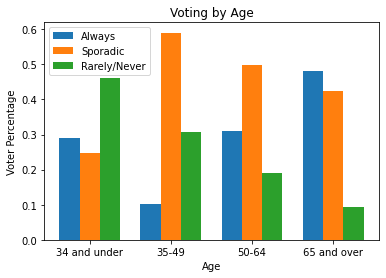

In [ ]:
import matplotlib.pyplot as plt

agerange1 = 0 #age 34 and under
alwayscount1 = 0
sporadiccount1 = 0
rarelycount1 = 0
agerange2 = 0 #age 35 - 49
alwayscount2 = 0
sporadiccount2 = 0
rarelycount2 = 0
agerange3 = 0 #age 50 - 64
alwayscount3 = 0
sporadiccount3 = 0
rarelycount3 = 0
agerange4 = 0 #age 65 and over
alwayscount4 = 0
sporadiccount4 = 0
rarelycount4 = 0

for i in range(0, len(data)):
    age = data.ppage[i]
    if age <= 34: 
        agerange1 +=1
        if data.voter_category[i] == 'always': alwayscount1 +=1
        elif data.voter_category[i] == 'sporadic': sporadiccount1 +=1
        else: rarelycount1 +=1
    elif 35 <= age and age <= 49: 
        agerange2 +=1
        if data.voter_category[i] == 'always': alwayscount2 +=1
        elif data.voter_category[i] == 'sporadic': sporadiccount2 +=1
        else: rarelycount2 +=1
    elif 50 <= age and age <= 64: 
        agerange3 +=1
        if data.voter_category[i] == 'always': alwayscount3 +=1
        elif data.voter_category[i] == 'sporadic': sporadiccount3 +=1
        else: rarelycount3 +=1
    else: 
        agerange4 +=1
        if data.voter_category[i] == 'always': alwayscount4 +=1
        elif data.voter_category[i] == 'sporadic': sporadiccount4 +=1
        else: rarelycount4 +=1

df = {'34 and under': alwayscount1/agerange1, '35 - 49': alwayscount2/agerange2, '50 - 64': alwayscount3/agerange3,
     '65 and over': alwayscount4/agerange4}
df2 = {'34 and under': sporadiccount1/agerange1, '35 - 49': sporadiccount2/agerange2, '50 - 64': sporadiccount3/agerange3,
     '65 and over': sporadiccount4/agerange4}
df3 = {'34 and under': rarelycount1/agerange1, '35 - 49': rarelycount2/agerange2, '50 - 64': rarelycount3/agerange3,
     '65 and over': rarelycount4/agerange4}

ind = np.arange(4)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('Age')
plt.ylabel('Voter Percentage')
plt.title('Voting by Age')
plt.xticks(ind+width,['34 and under', '35-49', '50-64', '65 and over'])
plt.legend( (bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()

In [ ]:
import scipy.stats

dict = {}
for i in range(0, len(data)):
    age = data.ppage[i]
    if age <= 34: 
        dict[i] = "34 and under"
    elif 35 <= age and age <= 49: 
        dict[i] = "35-49"
    elif 50 <= age and age <= 64:
        dict[i] = "50-64"
    else:
        dict[i] = "65 and over"

cont = pd.crosstab(dict,data["voter_category"], rownames=["age ranges"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between age and voter category")
else:
    print("Retain H0,There is no relationship between age and voter category")

voter category  always  rarely/never  sporadic
age ranges                                    
34 and under       381           604       325
35-49              123           366       704
50-64              542           331       870
65 and over        765           150       675

Chi-Squared 931.6187692672248

Critical value
12.591587243743977

Reject H0,There is a relationship between age and voter category


In [78]:
voter_category=[]
for i in range(0, len(data)):
  voter=data.voter_category[i]
  if voter=='always':
    voter_category.append(0)
  elif voter=='sporadic':
    voter_category.append(1)
  else:
    voter_category.append(2)
races=[]
for i in range(0, len(data)):
  race=data.race[i]
  if race=='Black':
    races.append(0)
  elif race=='Hispanic':
    races.append(1)
  elif race=='White':
    races.append(2)
  else:
    races.append(3)
Parties=data['Q30']
voting_Importance=data['Q5']
elected_officials=data['Q6']
gov_change=data['Q7']
dic={'Voting Importance':voting_Importance, 'Elected Official Similarity':elected_officials, 
     'Need for Change':gov_change, 'Political Party':Parties, 'Race':races, 'Voter Category':voter_category}
data2=pd.DataFrame(dic)
data2

,Voting Importance,Elected Official Similarity,Need for Change,Political Party,Race,Voter Category
0,1,2,1,2,2,0
1,1,2,2,3,2,0
2,1,1,1,2,2,1
3,1,3,1,2,0,1
4,1,2,2,1,2,0
...,...,...,...,...,...,...
5831,1,3,1,2,1,0
5832,1,2,1,2,2,2
5833,1,2,2,2,3,1
5834,2,4,1,3,0,0


In [79]:
target=[]
target=data2['Voter Category'].values
data2=data2.drop('Voter Category', axis=1)

In [84]:
x=data2
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
result1=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([0, 0, 1, 1, 0])

In [81]:
print('Accuracy:'+ str(result1))

Accuracy:0.4246575342465753


In [86]:
x=data2
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
result2=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([0, 0, 0, 0, 1])

In [83]:
print('Accuracy:'+ str(result2))

Accuracy:0.4118150684931507


In [93]:
x=data2
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
result3=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([1, 0, 1, 0, 2])

In [94]:
print('Accuracy:'+ str(result3))

Accuracy:0.4167023554603854


In [95]:
x=data2
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
result4=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([1, 0, 1, 0, 1])

In [96]:
print('Accuracy:'+ str(result4))

Accuracy:0.4295503211991435


In [69]:
data3=data
data3=data3.drop('Q22', axis=1)
data3=data3.drop('Q28_1', axis=1)
data3=data3.drop('Q28_2', axis=1)
data3=data3.drop('Q28_3', axis=1)
data3=data3.drop('Q28_4', axis=1)
data3=data3.drop('Q28_5', axis=1)
data3=data3.drop('Q28_6', axis=1)
data3=data3.drop('Q28_7', axis=1)
data3=data3.drop('Q28_8', axis=1)
data3=data3.drop('Q29_1', axis=1)
data3=data3.drop('Q29_2', axis=1)
data3=data3.drop('Q29_3', axis=1)
data3=data3.drop('Q29_4', axis=1)
data3=data3.drop('Q29_5', axis=1)
data3=data3.drop('Q29_6', axis=1)
data3=data3.drop('Q29_7', axis=1)
data3=data3.drop('Q29_8', axis=1)
data3=data3.drop('Q29_9', axis=1)
data3=data3.drop('Q29_10', axis=1)
data3=data3.drop('Q31', axis=1)
data3=data3.drop('Q32', axis=1)
data3=data3.drop('Q33', axis=1)
data3

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q27_4,Q27_5,Q27_6,Q30,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,1,1,1,2,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,1,1,1,3,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,1,1,1,2,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,1,1,1,2,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,1,1,1,81,High school or less,White,Male,$40-75k,always
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,1.1916,1,1,3,1,3,1,2,2,...,1,-1,-1,2,27,Some college,Hispanic,Male,$40-75k,always
5832,477663,1.4623,1,1,1,1,2,1,2,1,...,1,1,1,2,59,High school or less,White,Female,$125k or more,rarely/never
5833,488322,0.9252,1,1,2,1,3,1,1,2,...,1,1,1,2,51,College,Other/Mixed,Male,$125k or more,sporadic
5834,488325,2.6311,1,2,2,2,2,2,2,2,...,2,2,2,3,22,High school or less,Black,Female,Less than $40k,always


In [70]:
genders=[]
for i in range(0, len(data3)):
  gender=data3.gender[i]
  if str(data3.gender[i])=='Female':
    genders.append(0)
  elif str(data3.gender[i])=='Male':
    genders.append(1)
#print(genders)

In [71]:
Educations=[]
for i in range(0, len(data3)):
  education=data3.educ[i]
  if education=='High school or less':
    Educations.append(0)
  elif education=='Some college':
    Educations.append(1)
  else:
    Educations.append(2)

incomes=[]
for i in range(0, len(data3)):
  income=data3.income_cat[i]
  if income=='Less than $40k':
    incomes.append(0)
  elif income=='$40-75k':
    incomes.append(1)
  elif income=='$75-125k':
    incomes.append(2)
  else:
    incomes.append(3)
voter_category=[]
for i in range(0, len(data3)):
  voter=data.voter_category[i]
  if voter=='always':
    voter_category.append(0)
  elif voter=='sporadic':
    voter_category.append(1)
  else:
    voter_category.append(2)
races=[]
for i in range(0, len(data)):
  race=data.race[i]
  if race=='Black':
    races.append(0)
  elif race=='Hispanic':
    races.append(1)
  elif race=='White':
    races.append(2)
  else:
    races.append(3)
data3['educ']=Educations
data3['gender']=genders
data3['income_cat']=incomes
data3['voter_category']=voter_category
data3['race']=races
data3

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q27_4,Q27_5,Q27_6,Q30,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,1,1,1,2,73,2,2,0,2,0
1,470002,1.0267,1,1,2,2,3,1,1,2,...,1,1,1,3,90,2,2,0,3,0
2,470003,1.0844,1,1,1,2,2,1,1,2,...,1,1,1,2,53,2,2,1,3,1
3,470007,0.6817,1,1,1,1,3,1,1,1,...,1,1,1,2,58,1,0,0,1,1
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,1,1,1,81,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,1.1916,1,1,3,1,3,1,2,2,...,1,-1,-1,2,27,1,1,1,1,0
5832,477663,1.4623,1,1,1,1,2,1,2,1,...,1,1,1,2,59,0,2,0,3,2
5833,488322,0.9252,1,1,2,1,3,1,1,2,...,1,1,1,2,51,2,3,1,3,1
5834,488325,2.6311,1,2,2,2,2,2,2,2,...,2,2,2,3,22,0,0,0,0,0


In [72]:
target=[]
target=data3['voter_category'].values
data3=data3.drop('voter_category', axis=1)

In [97]:
x=data3
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
result5=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([0, 1, 1, 0, 0])

In [98]:
print('Accuracy:'+ str(result5))

Accuracy:0.4186643835616438


In [99]:
x=data3
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
result6=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([1, 2, 1, 0, 0])

In [101]:
print('Accuracy:'+ str(result6))

Accuracy:0.4032534246575342


In [102]:
x=data3
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
result7=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([0, 1, 0, 0, 0])

In [103]:
print('Accuracy:'+ str(result7))

Accuracy:0.42740899357601714


In [104]:
x=data3
y=target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=1, stratify=y)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
result8=knn.score(x_test,y_test)
prediction=knn.predict(x_test)
prediction[0:5]

array([1, 1, 0, 0, 0])

In [105]:
print('Accuracy:'+ str(result8))

Accuracy:0.4167023554603854


In [106]:
result=[result1, result2, result3, result4, result5, result6, result7, result8]
labels=['5 neighbors for selected variables with 20% of data kept for testing', '3 neighbors for selected variables with 20% of data kept for testing','5 neighbors for selected variables with 40% of data kept for testing', '3 neighbors for selected variables with 40% of data kept for testing','5 neighbors for all variables with 20% of data kept for testing', '3 neighbors for all variables with 20% of data kept for testing','5 neighbors for all variables with 40% of data kept for testing', '3 neighbors for all variables with 40% of data kept for testing']
dic={'Machine Learning Set-Up':labels ,'Accuracy':result}
data4=pd.DataFrame(dic)
data4

,Machine Learning Set-Up,Accuracy
0,5 neighbors for selected variables with 20% of...,0.424658
1,3 neighbors for selected variables with 20% of...,0.411815
2,5 neighbors for selected variables with 40% of...,0.416702
3,3 neighbors for selected variables with 40% of...,0.429550
4,5 neighbors for all variables with 20% of data...,0.418664
5,3 neighbors for all variables with 20% of data...,0.403253
6,5 neighbors for all variables with 40% of data...,0.427409
7,3 neighbors for all variables with 40% of data...,0.416702


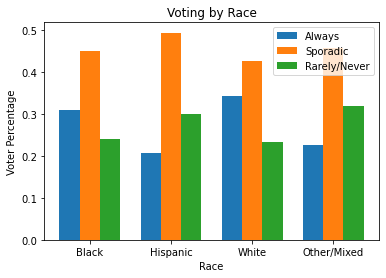

In [ ]:
blacktotal = 0
blackalwayscount = 0
blacksporadiccount = 0
blackrarelycount = 0
hispanictotal = 0
hispanicalwayscount = 0
hispanicsporadiccount = 0
hispanicrarelycount = 0
whitetotal = 0
whitealwayscount = 0
whitesporadiccount = 0
whiterarelycount = 0
othertotal= 0
otheralwayscount = 0
othersporadiccount = 0
otherrarelycount = 0

for i in range(0, len(data)):
    race = data.Q33[i]
    if race == 1:
        blacktotal +=1
        if data.voter_category[i] == 'always': blackalwayscount +=1
        elif data.voter_category[i] == 'sporadic': blacksporadiccount +=1
        else: blackrarelycount +=1
    elif race == 'Hispanic': 
        hispanictotal +=1
        if data.voter_category[i] == 'always': hispanicalwayscount +=1
        elif data.voter_category[i] == 'sporadic': hispanicsporadiccount +=1
        else: hispanicrarelycount +=1
    elif race == 'White': 
        whitetotal +=1
        if data.voter_category[i] == 'always': whitealwayscount +=1
        elif data.voter_category[i] == 'sporadic': whitesporadiccount +=1
        else: whiterarelycount +=1
    else: 
        othertotal +=1
        if data.voter_category[i] == 'always': otheralwayscount +=1
        elif data.voter_category[i] == 'sporadic': othersporadiccount +=1
        else: otherrarelycount +=1
            
df = {'Black': blackalwayscount/blacktotal, 'Hispanic': hispanicalwayscount/hispanictotal, 'White': whitealwayscount/whitetotal,
     'Other/Mixed': otheralwayscount/othertotal}
df2 = {'Black': blacksporadiccount/blacktotal, 'Hispanic': hispanicsporadiccount/hispanictotal, 
       'White': whitesporadiccount/whitetotal,'Other/Mixed': othersporadiccount/othertotal}
df3 = {'Black': blackrarelycount/blacktotal, 'Hispanic': hispanicrarelycount/hispanictotal, 
       'White': whiterarelycount/whitetotal,'Other/Mixed': otherrarelycount/othertotal}

ind = np.arange(4)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('Race')
plt.ylabel('Voter Percentage')
plt.title('Voting by Race')
plt.xticks(ind+width,['Black', 'Hispanic', 'White', 'Other/Mixed'])
plt.legend( (bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()

In [ ]:
cont = pd.crosstab(data["race"],data["voter_category"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between race and voter category")
else:
    print("Retain H0,There is no relationship between race and voter category")

voter category  always  rarely/never  sporadic
race                                          
Black              288           224       420
Hispanic           168           244       401
Other/Mixed         86           121       174
White             1269           862      1579

Chi-Squared 76.59285431945008

Critical value
12.591587243743977

Reject H0,There is a relationship between race and voter category


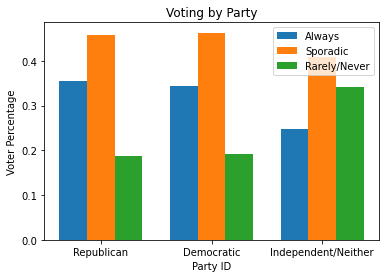

In [ ]:
demtotal = 0
demalwayscount = 0
demsporadiccount = 0
demrarelycount = 0
reptotal = 0
repalwayscount = 0
repsporadiccount = 0
reprarelycount = 0
neithertotal = 0
neitheralwayscount = 0
neithersporadiccount = 0
neitherrarelycount = 0

for i in range(0, len(data)):
    party = data.Q30[i]
    if party == 1:
        reptotal +=1
        if data.voter_category[i] == 'always': repalwayscount +=1
        elif data.voter_category[i] == 'sporadic': repsporadiccount +=1
        else: reprarelycount +=1
    elif party == 2: 
        demtotal +=1
        if data.voter_category[i] == 'always': demalwayscount +=1
        elif data.voter_category[i] == 'sporadic': demsporadiccount +=1
        else: demrarelycount +=1
    else: 
        neithertotal +=1
        if data.voter_category[i] == 'always': neitheralwayscount +=1
        elif data.voter_category[i] == 'sporadic': neithersporadiccount +=1
        else: neitherrarelycount +=1

df = {'Republican': repalwayscount/reptotal, 'Democratic': demalwayscount/demtotal, 
      'Independent/Neither': neitheralwayscount/neithertotal}
df2 = {'Republican': repsporadiccount/reptotal, 'Democratic': demsporadiccount/demtotal, 
      'Independent/Neither': neithersporadiccount/neithertotal}
df3 = {'Republican': reprarelycount/reptotal, 'Democratic': demrarelycount/demtotal, 
      'Independent/Neither': neitherrarelycount/neithertotal}

ind = np.arange(3)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('Party ID')
plt.ylabel('Voter Percentage')
plt.title('Voting by Party')
plt.xticks(ind+width,['Republican', 'Democratic', 'Independent/Neither'])
plt.legend((bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()

In [ ]:
dict = {}
for i in range(0, len(data)):
    party = data.Q30[i]
    if party == 1:
        dict[i] = "Republican"
    elif party == 2:
        dict[i] = "Democrat"
    else:
        dict[i] = "Independent/Neither"

cont = pd.crosstab(dict,data["voter_category"], rownames=["party affiliation"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between party affiliation and voter category")
else:
    print("Retain H0,There is no relationship between party affiliation and voter category")

voter category       always  rarely/never  sporadic
party affiliation                                  
Democrat                689           386       927
Independent/Neither     556           768       918
Republican              566           297       729

Chi-Squared 183.54005804934405

Critical value
9.487729036781154

Reject H0,There is a relationship between party affiliation and voter category


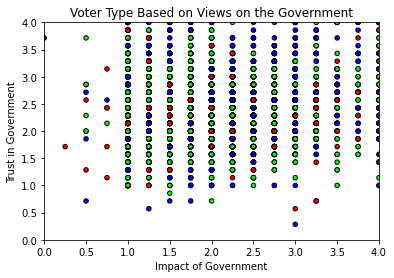

In [ ]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Q4_average = []

for i in range(0, len(data)):
    average = (data.Q4_1[i] + data.Q4_2[i] + data.Q4_3[i] + data.Q4_6[i]) / 4
    #if average > 0:
    Q4_average.append(average)

Q8_average = []

for i in range(0, len(data)):
    average = (data.Q8_1[i] + data.Q8_2[i] + data.Q8_3[i] + data.Q8_4[i] + data.Q8_5[i] + data.Q8_6[i] + data.Q8_8[i] ) / 7
    #if average > 0:
    Q8_average.append(average)

voter_category = []
for i in range (0, len(data)):
    if data.voter_category[i] == 'always': voter_category.append(0)
    elif data.voter_category[i] == 'sporadic': voter_category.append(1)
    else: voter_category.append(2)
        
plt.scatter(Q4_average, Q8_average, s= 20, c=voter_category, cmap=cmap_bold, edgecolor="k")
plt.xlim(0, 4)
plt.ylim(0,4)
plt.xlabel('Impact of Government')
plt.ylabel('Trust in Government')
plt.title('Voter Type Based on Views on the Government')
plt.show()

In [ ]:
dict_impact = {}

for i in range(0, len(data)):
    average = (data.Q4_1[i] + data.Q4_2[i] + data.Q4_3[i] + data.Q4_6[i]) / 4
    #if average > 0:
    dict_impact[i] = average

cont = pd.crosstab(dict_impact,data["voter_category"], rownames=["perceived impact of government"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between perceived impact of government and voter category")
else:
    print("Retain H0,There is no relationship between perceived impact of government and voter category")
    
dict_trust = {}

for i in range(0, len(data)):
    average = (data.Q8_1[i] + data.Q8_2[i] + data.Q8_3[i] + data.Q8_4[i] + data.Q8_5[i] + data.Q8_6[i] + data.Q8_8[i] ) / 7
    #if average > 0:
    dict_trust[i] = average
    
cont = pd.crosstab(dict_trust,data["voter_category"], rownames=["trust in government"], colnames=["voter category"])
print()
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between trust in government and voter category")
else:
    print("Retain H0,There is no relationship between trust in government and voter category")

voter category                  always  rarely/never  sporadic
perceived impact of government                                
-1.00                                6            10         8
 0.00                                0             1         0
 0.25                                1             0         0
 0.50                                4             4         4
 0.75                                5             1         1
 1.00                              308           155       408
 1.25                              235           119       283
 1.50                              250           120       304
 1.75                              236           165       356
 2.00                              281           243       382
 2.25                              170           127       257
 2.50                              120           124       186
 2.75                               65           105       126
 3.00                               67           102   

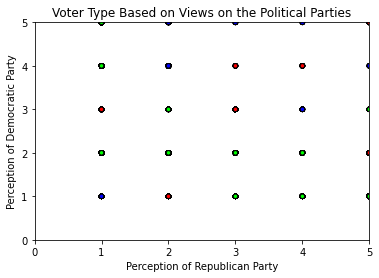

In [ ]:
Q14_data = []

for i in range(0, len(data)):
    Q14_data.append(data.Q14[i])

Q15_data = []

for i in range(0, len(data)):
    Q15_data.append(data.Q15[i])

plt.scatter(Q14_data, Q15_data, s=20, c=voter_category, cmap=cmap_bold, edgecolor="k")
plt.xlim(0, 5)
plt.ylim(0,5)
plt.xlabel('Perception of Republican Party')
plt.ylabel('Perception of Democratic Party')
plt.title('Voter Type Based on Views on the Political Parties')
plt.show()

In [ ]:
cont = pd.crosstab(data["Q14"],data["voter_category"], rownames=["perception of Republican party"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between perception of Republican party and voter category")
else:
    print("Retain H0,There is no relationship between perception of Republican party and voter category")
    
cont = pd.crosstab(data["Q15"],data["voter_category"], rownames=["perception of Democratic party"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between perception of Democratic party and voter category")
else:
    print("Retain H0,There is no relationship between perception of Democratic party and voter category")

voter category                  always  rarely/never  sporadic
perception of Republican party                                
-1                                  38           101        65
 1                                 605           408       826
 2                                 310           255       510
 3                                 169           296       293
 4                                 112           101       152
 5                                 577           290       728

Chi-Squared 209.35104541862214

Critical value
18.307038053275146

Reject H0,There is a relationship between perception of Republican party and voter category
voter category                  always  rarely/never  sporadic
perception of Democratic party                                
-1                                  29           102        61
 1                                 715           486      1035
 2                                 439           350       663
 3                   

In [ ]:
cont = pd.crosstab(index=data["voter_category"],
                   columns=[data["Q14"],
                            data["Q15"]],
                   rownames=["voter category"],
                   colnames=["perception of Republican party", "perception of Democratic party"])
cont

perception of Republican party  -1                   1                ...   4  \
perception of Democratic party  -1   1  2  3  4  5  -1    1    2   3  ...   2   
voter category                                                        ...       
always                          14  10  7  1  3  3   6  112   83  77  ...  43   
rarely/never                    71   9  4  9  3  5  12  155   70  47  ...  37   
sporadic                        37  19  1  5  1  2  14  197  124  92  ...  55   

perception of Republican party             5                       
perception of Democratic party   3   4  5 -1    1    2   3  4   5  
voter category                                                     
always                           4   2  1  4  380  164   4  2  23  
rarely/never                    14  11  3  6  157   87   9  6  25  
sporadic                         1  10  3  5  468  220  10  2  23  

[3 rows x 36 columns]

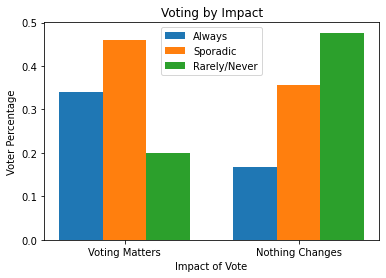

In [ ]:
matterscount = 0
mattersalways = 0
matterssporadic = 0
mattersrarely = 0
samecount = 0
samealways = 0
samesporadic = 0
samerarely = 0

for i in range(0, len(data)): 
    if data.Q5[i] == 1:
        matterscount +=1
        if data.voter_category[i] == 'always': mattersalways +=1
        elif data.voter_category[i] == 'sporadic': matterssporadic +=1
        else: mattersrarely +=1
    else: 
        samecount +=1
        if data.voter_category[i] == 'always': samealways +=1
        elif data.voter_category[i] == 'sporadic': samesporadic +=1
        else: samerarely +=1

df = {'Voting Matters': mattersalways/matterscount, 'Nothing Changes': samealways/samecount}
df2 = {'Voting Matters': matterssporadic/matterscount, 'Nothing Changes': samesporadic/samecount}
df3 = {'Voting Matters': mattersrarely/matterscount, 'Nothing Changes': samerarely/samecount}
ind = np.arange(2)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('Impact of Vote')
plt.ylabel('Voter Percentage')
plt.title('Voting by Impact')
plt.xticks(ind+width,['Voting Matters', 'Nothing Changes'])
plt.legend((bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()

In [ ]:
dict = {}

for i in range(0, len(data)): 
    if data.Q5[i] == 1:
        dict[i] = "voting matters"
    else:
        dict[i] = "nothing changes"
        
cont = pd.crosstab(dict,data["voter_category"], rownames=["impact of vote"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between perceived impact of vote and voter category")
else:
    print("Retain H0,There is no relationship between perceived impact of vote and voter category")

voter category   always  rarely/never  sporadic
impact of vote                                 
nothing changes     172           489       365
voting matters     1639           962      2209

Chi-Squared 362.42632253612123

Critical value
5.991464547107979

Reject H0,There is a relationship between perceived impact of vote and voter category


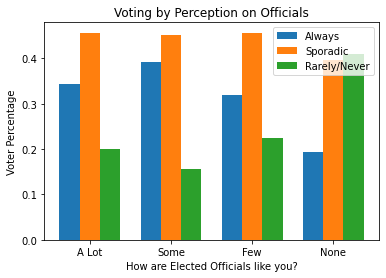

In [ ]:
alotcount = 0
alotalways = 0
alotsporadic = 0
alotrarely = 0
somecount = 0
somealways = 0
somesporadic = 0
somerarely = 0
fewcount = 0
fewalways = 0
fewsporadic = 0
fewrarely = 0
nonecount = 0
nonealways = 0
nonesporadic = 0
nonerarely = 0

for i in range(0, len(data)): 
    if data.Q6[i] == 1:
        alotcount +=1
        if data.voter_category[i] == 'always': alotalways +=1
        elif data.voter_category[i] == 'sporadic': alotsporadic +=1
        else: alotrarely +=1
    elif data.Q6[i] == 2:
        somecount +=1
        if data.voter_category[i] == 'always': somealways +=1
        elif data.voter_category[i] == 'sporadic': somesporadic +=1
        else: somerarely +=1
    elif data.Q6[i] == 3:
        fewcount +=1
        if data.voter_category[i] == 'always': fewalways +=1
        elif data.voter_category[i] == 'sporadic': fewsporadic +=1
        else: fewrarely +=1
    else:
        nonecount +=1
        if data.voter_category[i] == 'always': nonealways +=1
        elif data.voter_category[i] == 'sporadic': nonesporadic +=1
        else: nonerarely +=1
            
df = {'A Lot': alotalways/alotcount, 'Some': somealways/somecount, 'Few': fewalways/fewcount,
     'None': nonealways/nonecount}
df2 = {'A Lot': alotsporadic/alotcount, 'Some': somesporadic/somecount, 'Few': fewsporadic/fewcount,
     'None': nonesporadic/nonecount}
df3 = {'A Lot': alotrarely/alotcount, 'Some': somerarely/somecount, 'Few': fewrarely/fewcount,
     'None': nonerarely/nonecount}
ind = np.arange(4)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('How are Elected Officials like you?')
plt.ylabel('Voter Percentage')
plt.title('Voting by Perception on Officials')
plt.xticks(ind+width,['A Lot', 'Some', 'Few', 'None'])
plt.legend( (bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()

In [ ]:
dict = {}

for i in range(0, len(data)): 
    if data.Q6[i] == 1:
        dict[i] = "a lot"
    elif data.Q6[i] == 2:
        dict[i] = "some"
    elif data.Q6[i] == 3:
        dict[i] = "only a few"
    elif data.Q6[i] == 4:
        dict[i] = "none"
        
cont = pd.crosstab(dict,data["voter_category"], rownames=["how many elected officials are relatable"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between how many elected officials are relatable and voter category")
else:
    print("Retain H0,There is no relationship between how many elected officials are relatable and voter category")

voter category                            always  rarely/never  sporadic
how many elected officials are relatable                                
a lot                                         79            46       105
none                                         256           544       522
only a few                                   852           599      1218
some                                         616           245       707

Chi-Squared 305.90252708042203

Critical value
12.591587243743977

Reject H0,There is a relationship between how many elected officials are relatable and voter category


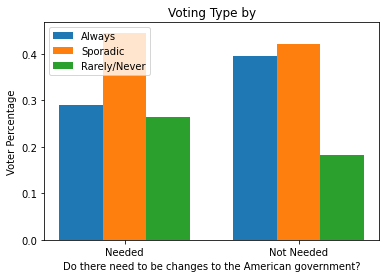

In [ ]:
neededcount = 0
neededalways = 0
neededsporadic = 0
neededrarely = 0
notneededcount = 0
notneededalways = 0
notneededsporadic = 0
notneededrarely = 0

for i in range(0, len(data)):
    if data.Q7[i] == 1:
        neededcount +=1
        if data.voter_category[i] == 'always': neededalways +=1
        elif data.voter_category[i] == 'sporadic': neededsporadic +=1
        else: neededrarely +=1
    else:
        notneededcount +=1
        if data.voter_category[i] == 'always': notneededalways +=1
        elif data.voter_category[i] == 'sporadic': notneededsporadic +=1
        else: notneededrarely +=1

df = {'Needed': neededalways/neededcount, 'Not Needed': notneededalways/notneededcount}
df2 = {'Needed': neededsporadic/neededcount, 'Not Needed': notneededsporadic/notneededcount}
df3 = {'Needed': neededrarely/neededcount, 'Not Needed': notneededrarely/notneededcount}
ind = np.arange(2)
width = 0.25
bar1 = plt.bar(ind, list(df.values()), width)
bar2 = plt.bar(ind+width, list(df2.values()), width)
bar3 = plt.bar(ind+width*2, list(df3.values()), width)
plt.xlabel('Do there need to be changes to the American government?')
plt.ylabel('Voter Percentage')
plt.title('Voting Type by')
plt.xticks(ind+width,['Needed', 'Not Needed'])
plt.legend((bar1, bar2, bar3), ('Always', 'Sporadic', 'Rarely/Never') )
plt.show()         


In [ ]:
dict = {}

for i in range(0, len(data)):
    if data.Q7[i] == 1:
        dict[i] = "lot of changes are needed"
    else:
        dict[i] = "not a lot of changes are needed"
        
cont = pd.crosstab(dict,data["voter_category"], rownames=["do there need to be changes in US gov"], colnames=["voter category"])
print(cont)
print()

chi2, p, dof, ex = scipy.stats.chi2_contingency(cont)
print("Chi-Squared",chi2)

crit = scipy.stats.chi2.ppf(q = 0.95, df = dof)# Find the critical value for 95% confidence*
                        
print()
print("Critical value")
print(crit)
print()

if chi2>=crit:
    print("Reject H0,There is a relationship between do there need to be changes to US gov and voter category")
else:
    print("Retain H0,There is no relationship between do there need to be changes to US gov and voter category")

voter category                         always  rarely/never  sporadic
do there need to be changes in US gov                                
lot of changes are needed                1350          1237      2081
not a lot of changes are needed           461           214       493

Chi-Squared 59.82104151704389

Critical value
5.991464547107979

Reject H0,There is a relationship between do there need to be changes to US gov and voter category
